#Santiago Herrera Guzmán
##CC. 1010157719

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp

# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 30.09.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

a)

Primero definimos los valores de nuestras constantes y la función que vamos a integrar.

In [2]:
k = -0.06
t2 = (0.0,60.0) #Constantes
T = 25.0
y_02 = [90]

def f2(t,y): #Función a integrar
  return k * (y - T)

In [3]:
t2_eval=np.linspace(0,60.0,100)
solucion2 = solve_ivp(f2, t2, y_02, t_eval = t2_eval) #Solucion 


b)

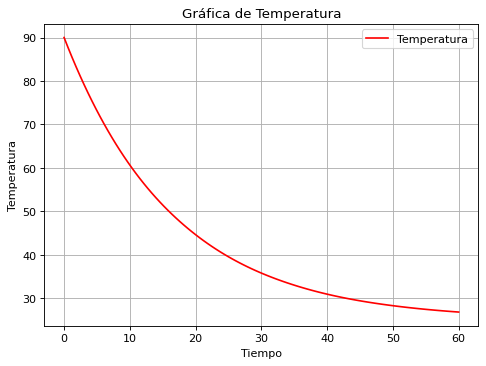

In [4]:
fig,ax=plt.subplots(figsize=(7, 5), dpi=80)

ax.plot(solucion2.t, solucion2.y[0],  label = 'Temperatura', color= 'red')
ax.set_title('Gráfica de Temperatura')
ax.set_ylabel('Temperatura')
ax.set_xlabel('Tiempo')
ax.legend()
ax.grid()

In [5]:
tiempo = solucion2.t[np.argwhere(solucion2.y[0] > 70)][-1]

print(f'El tiempo máximo que puede esperar para tomarse el café por encima de 70° es {round(tiempo[0],2)} minutos.')

El tiempo máximo que puede esperar para tomarse el café por encima de 70° es 6.06 minutos.


## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


a)

Para lograr ésto, vamos a utilizar el siguiente sistema de ecuaciones:
$$\frac{dv}{dt} = -g $$
$$\frac{dy}{dt} = v $$

In [17]:
def f3(t,y):
    dydt=np.zeros((y.shape))  #Defino el sistema de Ecuaciones que voy a integrar
    dydt[0]=y[0]
    dydt[1]=-9.81
    return dydt

def bc(ya,yb):
    residuo=np.array([0.0,0.0]) #Defino las condiciones de frontera
    residuo[0]=ya[0] - 0.0
    residuo[1]=yb[0] - 40.0
    return residuo

In [18]:
t3 = np.linspace(0,5,100) #Defino el espacio sobre el que voy a integrar
y = np.ones((2,100))

soluciones3 = solve_bvp(f3, bc, t3, y) #soluciono el sistema de ecuaciones

b)

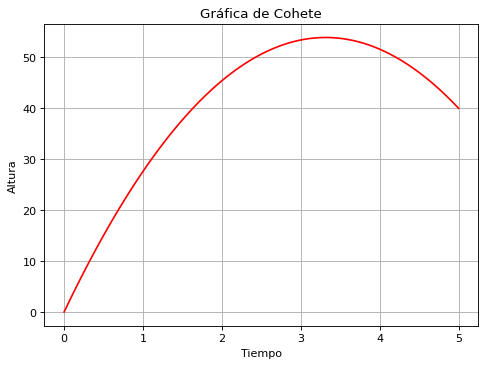

In [19]:
fig,ax=plt.subplots(figsize=(7, 5), dpi=80)

ax.plot(t3, soluciones3.y[0], color= 'red')
ax.set_title('Gráfica de Cohete')
ax.set_ylabel('Altura')
ax.set_xlabel('Tiempo')
#ax.legend()
ax.grid()

## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones. 

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

![](https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_IV/rabbits_foxes.png)

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` o `scipy.integrate.odeint`
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

a)

In [9]:
alpha = 1
beta = 1
gamma = 1
delta = 1
y_0 = [4,2]
t_span = (0.0, 30.0)

def f(t,y):
  dx = y[0] * (alpha - beta*y[1])
  dy = -y[1] * (gamma - delta*y[0])

  return [dx,dy]

In [10]:
soluciones = solve_ivp(f, t_span, y_0)

b)

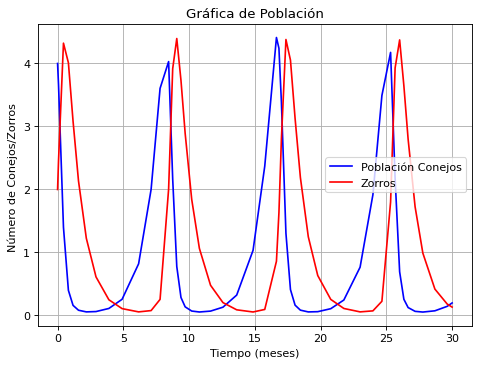

In [11]:
fig,ax=plt.subplots(figsize=(7, 5), dpi=80)

ax.plot(soluciones.t, soluciones.y[0], label = 'Población Conejos', color= 'blue')
ax.plot(soluciones.t, soluciones.y[1], label = 'Zorros', color= 'red')
ax.set_title('Gráfica de Población')
ax.set_ylabel('Número de Conejos/Zorros ')
ax.set_xlabel('Tiempo (meses)')
ax.legend()
ax.grid()

Como se observa en el comportamiento de la gráfica, a medida que aumenta la población de zorros, el número de conejos va disminutendo notablemente. Ésto debido a que como hay tanta depredación, no se compensa con el ritmo al que se reproducen los conejos; por lo que su población disminuye.

Ahora cuando es muy baja la población de conejos, llega un punto en que la de los zorros comienza a decaer y así el número de conejos comienza a crecer lentamente. Todo provocado a que la competenecia por el alimento es tan fuerte, que algunos depredadores se quedan sin presa, por tanto mueren, aumenta la tasa de mortalidad para los zorros y baja para los conejos.

Ya luego comienza a aumentar demasiado el número de conejos que los depredadores obtendrán mucho alimento para cada uno; así que nuevamente la población de zorros vuelve a subir. Así hasta cierto punto que los conejos empiecen a disminuir de individuos por el número de depredadores, reiniciando el ciclo nuevamente. 

c)

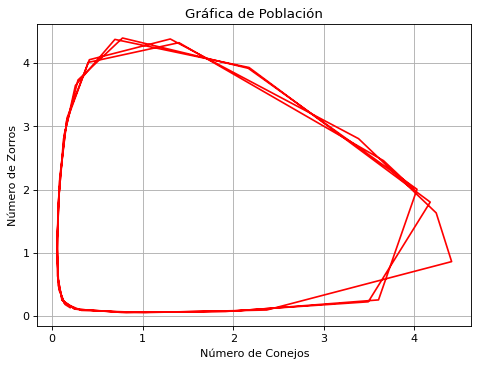

In [12]:
fig,ax=plt.subplots(figsize=(7, 5), dpi=80)

ax.plot(soluciones.y[0], soluciones.y[1], color= 'red')
ax.set_title('Gráfica de Población')
ax.set_ylabel('Número de Zorros')
ax.set_xlabel('Número de Conejos')
#ax.legend()
ax.grid()

En la anterior gráfica, se observa una curiosa relación entre el número de depredadores y presas.
Si la población de uno crece demasiado; la otra también lo hará, provocando que la inicial disminuya. Preservando un equilibrio entre las especies.

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	4.0p

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	2.0p
- hay error en derivada: ydt[0]=y[0]

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  10.0p



- Total:                                              (max 10.0p):   10.0p
```